# Predicting Video Game Sales

What is affecting game sales in North America?
How can I use game data to predict game sales in North America?
What is driving game sales in North America?
What is the best predictor of game sales in North America?

I will develop a multiple linear regression model that will offer insight into what drives game sales in North America and predict game sales for future sales strategy.

I will use the OSEMN Framework (Obtain, Scrub, Explore, Model, Interpret)

## Obtain

I will import and observe the data, then select columns that will serve as useful predictors for a multiple linear regression model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import scipy.stats as stats
plt.style.use('ggplot')

df = pd.read_csv("train.csv")
df_predict = pd.read_csv("test.csv")
df.head()

,Id,NA_Sales,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,0.00,PSP,2008.0,Misc,Sony Computer Entertainment,0.06,81.0,49.0,8.3,62.0,SCE Japan Studio,E
1,1,0.72,2600,1982.0,Shooter,Atari,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.11,XB,2004.0,Action,THQ,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.15,X360,2008.0,Fighting,Electronic Arts,0.00,54.0,57.0,6.3,19.0,EA Canada,T
4,4,0.00,DS,2006.0,Action,Namco Bandai Games,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Understanding the data:
    
Data fields

    Id - A unique ID for each game in the dataset
    NA_Sales - Game sales in North America (in millions of units)
    Platform - Console on which the game is running
    Year_of_Release - Year the game was released
    Genre - Game category
    Publisher - Publisher
    JP_Sales - Game sales in Japan (in millions of units)
    Critic_Score - Aggregate score compiled by Metacritic staff
    Critic_Count - The number of critics used in coming up with the Critic_score
    User_Score - Score by Metacritic's subscribers
    User_Count - Number of users who gave the user_score
    Developer - Party responsible for creating the game
    Rating - The ESRB ratings (E.g. Everyone, Teen, Adults Only, etc.)
    

Some categorical variables are Platform, Genre, Publisher, Developer and Rating


Critic_Score, Critic_Count, User_Score, and User_Count, and Rating have a lot of NaN values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11703 entries, 0 to 11702
Data columns (total 13 columns):
Id                 11703 non-null int64
NA_Sales           11703 non-null float64
Platform           11703 non-null object
Year_of_Release    11520 non-null float64
Genre              11701 non-null object
Publisher          11664 non-null object
JP_Sales           11703 non-null float64
Critic_Score       5697 non-null float64
Critic_Count       5697 non-null float64
User_Score         7011 non-null object
User_Count         5332 non-null float64
Developer          7066 non-null object
Rating             6978 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


The variables seem to have appropriate data types based on what appears in the database, except User_Score.
User_Score is listed as an object (string) although it appears to be intended as numerical in the dataset.

In [3]:
df.describe()

,Id,NA_Sales,Year_of_Release,JP_Sales,Critic_Score,Critic_Count,User_Count
count,11703.000000,11703.000000,11520.00000,11703.000000,5697.000000,5697.000000,5332.000000
mean,5851.000000,0.267547,2006.55217,0.080238,68.909602,26.554151,166.707802
std,3378.509435,0.851607,5.85593,0.318587,14.052323,19.193370,581.024155
min,0.000000,0.000000,1980.00000,0.000000,13.000000,3.000000,4.000000
25%,2925.500000,0.000000,2003.00000,0.000000,60.000000,12.000000,10.000000
50%,5851.000000,0.080000,2007.00000,0.000000,71.000000,22.000000,25.000000
75%,8776.500000,0.240000,2010.00000,0.040000,79.000000,36.000000,84.000000
max,11702.000000,41.360000,2017.00000,7.200000,98.000000,113.000000,10665.000000


Above shows basic statistics for all the "numerical" columns in the dataset. 
The categorical variable, Id, is considered continuous. 
Since it's a label variable, I won't be considering its mean and sd values.


### Check for the normality assumption: 
I plot histograms for all variables in the dataset.

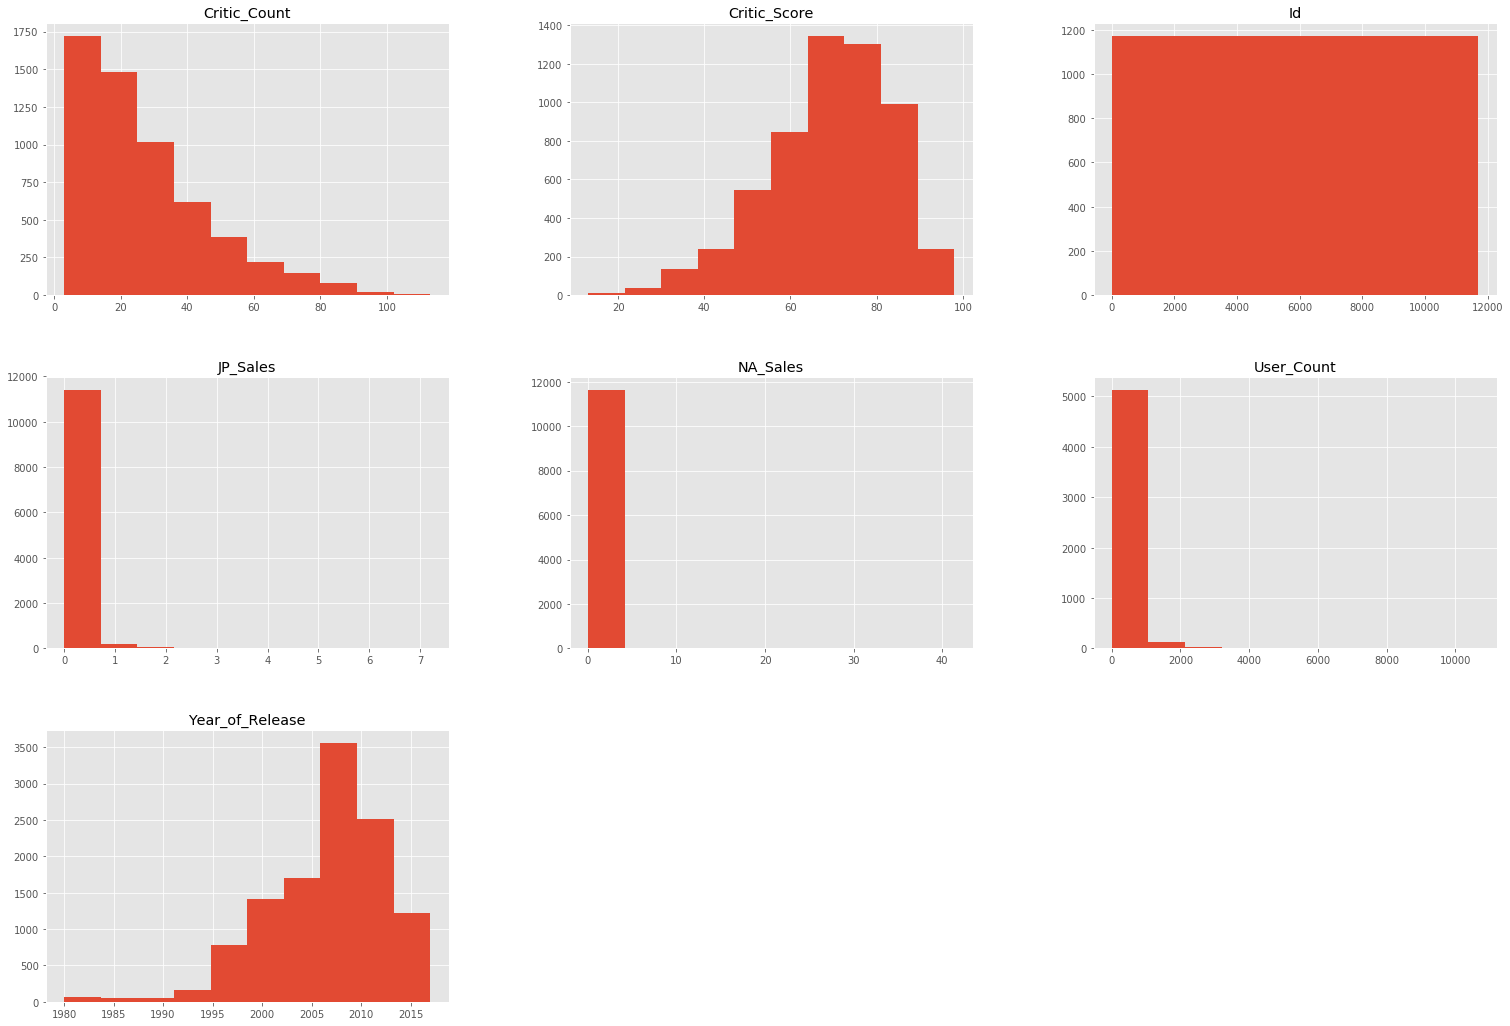

In [4]:
df[['Id', 'NA_Sales', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']].hist(figsize  = (26, 18));
#df[['NA_Sales', 'Year_of_Release', JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].hist(figsize  = (20, 18));

Above shows histograms for all the "numerical" columns in the dataset.
All of the variables clearly break the normal assumption for a linear regression.

**Critic_Count** has a positive skew. 

**Critic_Score** and **Year_of_Release** are negatively skewed.

**JP_Sales**, **NA_Sales** and **User_Count** have an overwhelming amount of 0 values.

**Id** is not continuous, but rather a label variable (category), so I don't expect its distribution to be normal.

**User_Score** doesn't show up because it is considered an object (string).

The data needs more preprocessing to clean it up.

I will build normalized histograms with kde plots for visualizing the probability densities.

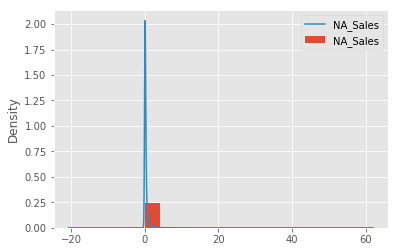

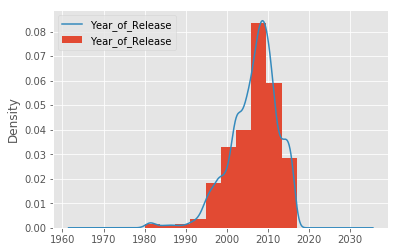

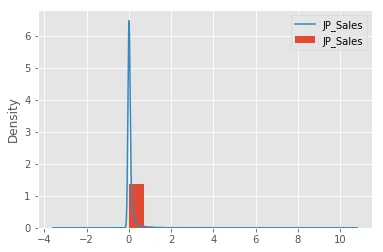

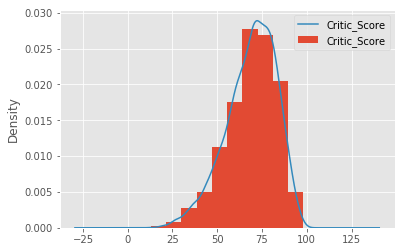

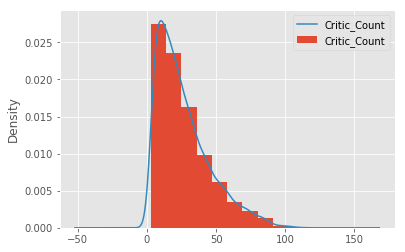

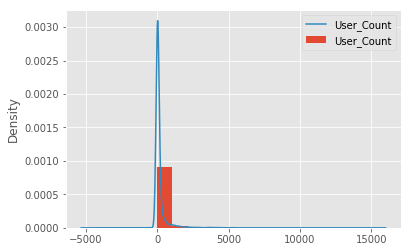

In [5]:
#kde_array = ['NA_Sales', 'Year_of_Release', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', User_Count']
kde_array = ['NA_Sales', 'Year_of_Release', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']
for column in kde_array:
    df[column].plot.hist(density=True)
    df[column].plot.kde(label=column )
    plt.legend();
    plt.show();

**User_Score** returned the error message: 'no numeric data to plot', since it's an object that is obviously numerical I will have to clean it up later.

The number of distributions are unimodal- they have one typical value.
However, the kde confirms my observation from the histograms, that some variables large amount of 0 values, and that others are skewed.

For the most part, they do not pass the normality assumption, but with some cleaning, the skewed variables will appear more normal.


### Check for the linearity assumption:
I'm going to build jointplots to check for the linearity assumption between predictors and the target variable.

(Jointplots uses scatter plots, distributions, kde and simple regression line - to inspect linearity and normality all in a single step)

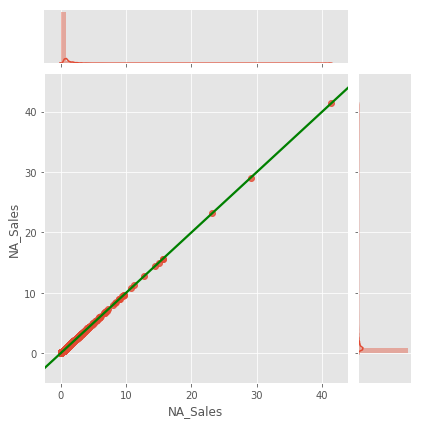

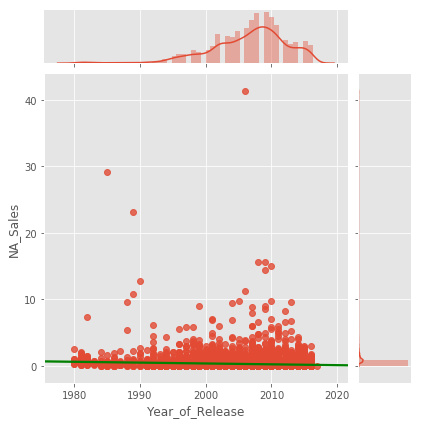

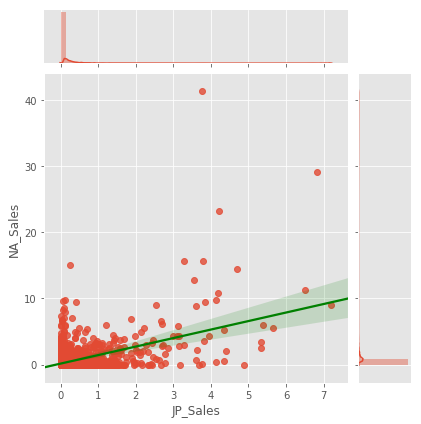

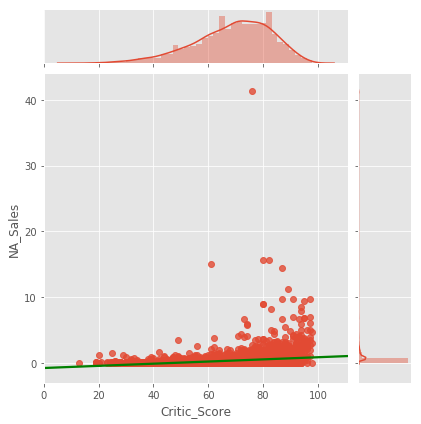

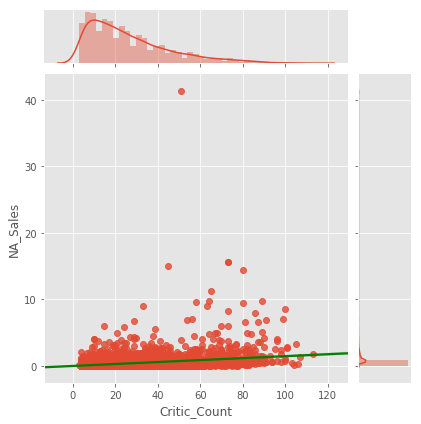

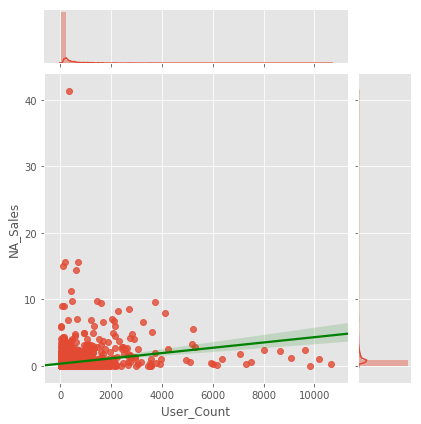

In [6]:
for column in kde_array:
    sns.jointplot(x=column, y="NA_Sales",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})


The joint plots further confirm the observations I made earlier.

Some distributions are *almost* uniformly distributed, and others have a large amount of zeros.

The linear assumption holds true for JP_Sales and User_Count.
Year_of_Release has a straight line along the y-intercept. It appears to have no linear relationship with sales. (No slope --> no linear relation)

Critic_score and Critic_Count have a slightly positive slope. However it isn't enough to show a clear linear relationship with sales. 

I will look more closely into the values and clean them so that I can check again for the regression assumptions and use them as predictors.

## Scrub

I will clean the data for test and train datasets.

### Train.csv 

In [7]:
#Check for NaN values in and impute missing values for with the mean (for continuous variables only)

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

#There are so many 0 values in JP_Sales, I will impute the zeroes with the mean


Id                    0
NA_Sales              0
Platform              0
Year_of_Release     183
Genre                 2
Publisher            39
JP_Sales              0
Critic_Score       6006
Critic_Count       6006
User_Score         4692
User_Count         6371
Developer          4637
Rating             4725
dtype: int64


Id                    0
NA_Sales              0
Platform              0
Year_of_Release       0
Genre                 2
Publisher            39
JP_Sales              0
Critic_Score          0
Critic_Count          0
User_Score         4692
User_Count            0
Developer          4637
Rating             4725
dtype: int64

There are some columns, especially those of categorical variables, that still have missing values. I will deal with each one individually.

**User_Score**

Although seemingly numerical, User_Score couldn't get past the normality and linearity checks because it is considered an object (string).
Looking more closely at the column, there are plenty of 'tbd' string values, which suggests 'to be decided', or essentially a missing value.
I will remove the tbd values and impute the missing values for User_Score, so that I can appropriately check for the regression assumptions.

In [8]:
df.User_Score.head(7)

0    8.3
1    NaN
2    NaN
3    6.3
4    NaN
5    NaN
6    tbd
Name: User_Score, dtype: object

In [9]:
#Convert User_Score into a string
df.User_Score.head(3)

#Replace missing NaN values with 0
df.User_Score.fillna(0, inplace=True)

#Replace tbd values with 0
df['User_Score'] = df['User_Score'].replace('tbd','0')

#Turn column into a float
df['User_Score'] = pd.to_numeric(df["User_Score"], errors = 'coerce')
df['User_Score'].head(7)

#Impute NaN values with mean
df['User_Score'] = df['User_Score'].replace(0, np.NaN)
df['User_Score'].fillna(df.User_Score.mean(), inplace=True)

df.User_Score.head(7)

0    8.300000
1    7.126412
2    7.126412
3    6.300000
4    7.126412
5    7.126412
6    7.126412
Name: User_Score, dtype: float64

**Publisher** and **Developer**

The Publisher and Developer columns have too many unique values. They won't be useful for a regression model.

In [10]:
#Drop columns that have too many unique values for imputing
print(df.Publisher.nunique())
print(df.Developer.nunique())
df.drop('Publisher', axis=1, inplace=True)
df.drop('Developer', axis=1, inplace=True)

517
1495


In [11]:
df.head(3)

,Id,NA_Sales,Platform,Year_of_Release,Genre,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,0.00,PSP,2008.0,Misc,0.06,81.000000,49.000000,8.300000,62.000000,E
1,1,0.72,2600,1982.0,Shooter,0.00,68.909602,26.554151,7.126412,166.707802,NaN
2,2,0.11,XB,2004.0,Action,0.00,68.909602,26.554151,7.126412,166.707802,NaN


**Platform** and **Genre**

The Platform and Genre columns are have a few unique values.
They are cardinal (no order) categorical variables that can be useful for a regression model.

In [12]:
print(df.Platform.nunique())
print(df.Platform.unique())

#Dropping 2 rows of NaN values in Genre
df = df[pd.notnull(df['Genre'])]

print(df.Genre.nunique())
print(df.Genre.unique())

31
['PSP' '2600' 'XB' 'X360' 'DS' 'PS2' 'Wii' 'PS3' '3DS' 'PS' 'XOne' 'SNES'
 'WiiU' 'GBA' 'PS4' 'PC' 'PSV' 'SAT' 'GC' 'NES' 'N64' 'GEN' 'PCFX' 'GB'
 'DC' 'TG16' 'NG' 'SCD' 'WS' '3DO' 'GG']
12
['Misc' 'Shooter' 'Action' 'Fighting' 'Racing' 'Simulation' 'Sports'
 'Role-Playing' 'Platform' 'Strategy' 'Puzzle' 'Adventure']


I will transform them with scikit learn's label encoder to represent them as numbers.

In [13]:
#Labeling unique values with numbers
lb = preprocessing.LabelEncoder()

lb.fit(df.Platform)
list(lb.classes_)
df.Platform = lb.transform(df.Platform) 

lb.fit(df.Genre)
list(lb.classes_)
df.Genre = lb.transform(df.Genre)

print(df.Platform.unique(), '\n')
print(df.Genre.unique())

[19  0 29 28  4 16 26 17  2 15 30 23 27  6 18 13 20 21  7 11 10  8 14  5
  3 24 12 22 25  1  9] 

[ 3  8  0  2  6  9 10  7  4 11  5  1]


**Rating**

Rating appears to be a cardinal categorical variable. However it can be represented as ordinal since game ratings usually correspond with age.

    RP - Rating Pending
    EC - Early Childhood
    E - Everyone (K-A, kids to adults before 1998)
    E10+ - Everyone 10+
    T - Teen
    M - Mature 17+
    A - Adults only


In [14]:
df.Rating.unique()

array(['E', nan, 'T', 'M', 'E10+', 'EC', 'RP', 'K-A'], dtype=object)

In [15]:
#Impute NaN values with the mode
df.Rating.fillna(df.Rating.mode()[0], inplace=True)
df.Rating.head()

0    E
1    E
2    E
3    T
4    E
Name: Rating, dtype: object

I will transform them to represent them as numbers. However, since I wanted to preserve order I could not use scikit-learn or pd.factorize.

In [16]:
series = pd.Series(df.Rating)
mapper = {'RP': 0 , 'EC': 1, 'E': 2, 'K-A': 2, 'E10+': 3, 'T': 4, 'M': 5, 'A': 6}
df.Rating = series.replace(mapper)
df.Rating.head()

0    2
1    2
2    2
3    4
4    2
Name: Rating, dtype: int64

In [17]:
print(df.isnull().sum())
print(df.head())

Id                 0
NA_Sales           0
Platform           0
Year_of_Release    0
Genre              0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64
   Id  NA_Sales  Platform  Year_of_Release  Genre  JP_Sales  Critic_Score  \
0   0      0.00        19           2008.0      3      0.06     81.000000   
1   1      0.72         0           1982.0      8      0.00     68.909602   
2   2      0.11        29           2004.0      0      0.00     68.909602   
3   3      0.15        28           2008.0      2      0.00     54.000000   
4   4      0.00         4           2006.0      0      0.01     68.909602   

   Critic_Count  User_Score  User_Count  Rating  
0     49.000000    8.300000   62.000000       2  
1     26.554151    7.126412  166.707802       2  
2     26.554151    7.126412  166.707802       2  
3     57.000000    6.300000   19.000000       4  
4     26.554151    7.126412  166.707802    

### Test.csv

I did the same for the training dataset.

In [18]:
#Check for NaN values in and impute missing values for with the mean (for continuous variables only)

print(df_predict.isnull().sum())
df_predict.fillna(df_predict.mean(), inplace=True)
df_predict.isnull().sum()

Id                    0
Platform              0
Year_of_Release      86
Genre                 0
Publisher            15
JP_Sales              0
Critic_Score       2576
Critic_Count       2576
User_Score         2012
User_Count         2758
Developer          1986
Rating             2044
dtype: int64


Id                    0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            15
JP_Sales              0
Critic_Score          0
Critic_Count          0
User_Score         2012
User_Count            0
Developer          1986
Rating             2044
dtype: int64

In [19]:
#Continous Variables

#Replace missing NaN values with 0
df_predict.User_Score.fillna(0, inplace=True)

#User_Score

#Replace tbd values with 0
df_predict['User_Score'] = df_predict['User_Score'].replace('tbd','0')
#Turn column into a float
df_predict['User_Score'] = pd.to_numeric(df_predict["User_Score"], errors = 'coerce')
df_predict['User_Score'].head(7)
#Impute NaN values with mean
df_predict['User_Score'] = df_predict['User_Score'].replace(0, np.NaN)
df_predict['User_Score'].fillna(df_predict.User_Score.mean(), inplace=True)

#Publisher and Developer

print(df_predict.Publisher.nunique())
print(df_predict.Developer.nunique())
df_predict.drop('Publisher', axis=1, inplace=True)
df_predict.drop('Developer', axis=1, inplace=True)

#Platform and Genre

print(df_predict.Platform.nunique())
print(df_predict.Platform.unique())
print(df_predict.Genre.nunique())
print(df_predict.Genre.unique())
#Dropping 2 rows of NaN values in Genre
df_predict = df_predict[pd.notnull(df_predict['Genre'])]
#Labeling unique values with numbers
lb = preprocessing.LabelEncoder()
lb.fit(df_predict.Platform)
list(lb.classes_)
df_predict.Platform = lb.transform(df_predict.Platform) 
lb.fit(df_predict.Genre)
list(lb.classes_)
df_predict.Genre = lb.transform(df_predict.Genre)
print(df_predict.Platform.unique(), '\n')
print(df_predict.Genre.unique())

#Rating

#Impute NaN values with the mode
df_predict.Rating.fillna(df_predict.Rating.mode()[0], inplace=True)
#Transform to unique values to numbers
series = pd.Series(df_predict.Rating)
mapper = {'RP': 0 , 'EC': 1, 'E': 2, 'K-A': 2, 'E10+': 3, 'T': 4, 'M': 5, 'A': 6}
df_predict.Rating = series.replace(mapper)
df_predict.Rating.head()


385
965
27
['GB' 'Wii' 'NES' 'DS' 'PS3' 'PS2' 'X360' 'PS4' '3DS' 'N64' 'PS' 'SNES'
 'PC' 'XOne' 'GC' 'GBA' '2600' 'GEN' 'PSP' 'XB' 'DC' 'WiiU' 'PSV' 'SAT'
 'NG' 'SCD' 'TG16']
12
['Role-Playing' 'Misc' 'Shooter' 'Simulation' 'Action' 'Racing' 'Platform'
 'Sports' 'Fighting' 'Puzzle' 'Strategy' 'Adventure']
[ 4 22  9  3 14 13 24 15  1  8 12 20 11 26  6  5  0  7 16 25  2 23 17 18
 10 19 21] 

[ 7  3  8  9  0  6  4 10  2  5 11  1]


0    2
1    2
2    2
3    2
4    5
Name: Rating, dtype: object

In [20]:
print(df_predict.isnull().sum())
print(df_predict.head())

Id                 0
Platform           0
Year_of_Release    0
Genre              0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating             0
dtype: int64
      Id  Platform  Year_of_Release  Genre  JP_Sales  Critic_Score  \
0  11703         4           1996.0      7     10.22     69.103279   
1  11704        22           2006.0      3      2.93     58.000000   
2  11705         9           1984.0      8      0.28     69.103279   
3  11706         3           2005.0      9      1.93     69.103279   
4  11707        14           2013.0      0      0.98     97.000000   

   Critic_Count  User_Score  User_Count Rating  
0     25.909426    7.124978   151.65589      2  
1     41.000000    6.600000   129.00000      2  
2     25.909426    7.124978   151.65589      2  
3     25.909426    7.124978   151.65589      2  
4     50.000000    8.200000  3994.00000      5  


## Explore

Now that the the datasets are clean, I can explore the data and use the train dataset to come up with a model that will predict the test dataset.

### Descriptive Statistics

In [21]:
df.describe()

,Id,NA_Sales,Platform,Year_of_Release,Genre,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
count,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,5851.235792,0.267440,15.815059,2006.554487,4.929493,0.080250,68.909602,26.554151,7.126412,166.707802,2.722673
std,3378.695633,0.851561,8.365639,5.807755,3.761851,0.318613,9.804832,13.391934,1.004307,392.198202,1.060522
min,0.000000,0.000000,0.000000,1980.000000,0.000000,0.000000,13.000000,3.000000,0.200000,4.000000,0.000000
25%,2925.000000,0.000000,7.000000,2003.000000,1.000000,0.000000,68.909602,22.000000,7.126412,30.000000,2.000000
50%,5851.000000,0.080000,16.000000,2007.000000,5.000000,0.000000,68.909602,26.554151,7.126412,166.707802,2.000000
75%,8777.000000,0.240000,20.000000,2010.000000,8.000000,0.040000,70.000000,26.554151,7.300000,166.707802,4.000000
max,11702.000000,41.360000,30.000000,2017.000000,11.000000,7.200000,98.000000,113.000000,9.700000,10665.000000,5.000000


In [22]:
#df.Genre.value_counts().head()
#df.Rating.value_counts().head()
#df.Platform.value_counts().head()

### Visualization

"\nimport warnings\nwarnings.filterwarnings('ignore')\nfig = plt.figure(figsize = (8,8))\nax = fig.gca()\ndf.hist(ax = ax);\n\nkde_array = features\nfor column in kde_array:\n    df[column].plot.hist(density=True)\n    df[column].plot.kde(label=column )\n    plt.legend();\n    plt.show();\n"

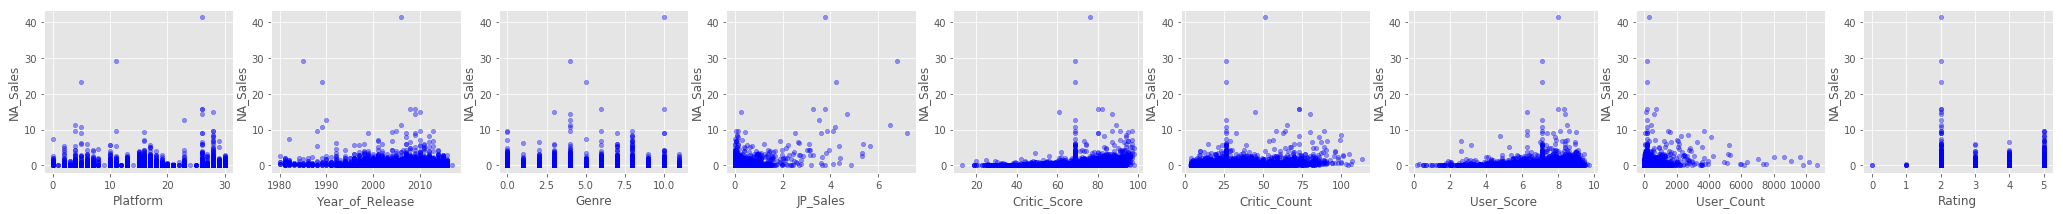

In [23]:
target = df[['NA_Sales']]
features = df[['Platform', 'Year_of_Release', 'Genre', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']]

fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(36,3))

for xcol, ax in zip(list(features)[0:9], axes):
    df.plot(kind='scatter', x= xcol, y="NA_Sales", ax=ax, alpha=0.4, color='b')
    
'''
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax);

kde_array = features
for column in kde_array:
    df[column].plot.hist(density=True)
    df[column].plot.kde(label=column )
    plt.legend();
    plt.show();
'''

In [24]:
#Setting the NA_Sales as the index
df.set_index(["NA_Sales"], inplace = True, 
                    append = True, drop = False)

#Dropping the Id column
df = df.drop(columns=['Id'])
df.head()

,,NA_Sales,Platform,Year_of_Release,Genre,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
,NA_Sales,,,,,,,,,,
0,0.00,0.00,19,2008.0,3,0.06,81.000000,49.000000,8.300000,62.000000,2
1,0.72,0.72,0,1982.0,8,0.00,68.909602,26.554151,7.126412,166.707802,2
2,0.11,0.11,29,2004.0,0,0.00,68.909602,26.554151,7.126412,166.707802,2
3,0.15,0.15,28,2008.0,2,0.00,54.000000,57.000000,6.300000,19.000000,4
4,0.00,0.00,4,2006.0,0,0.01,68.909602,26.554151,7.126412,166.707802,2


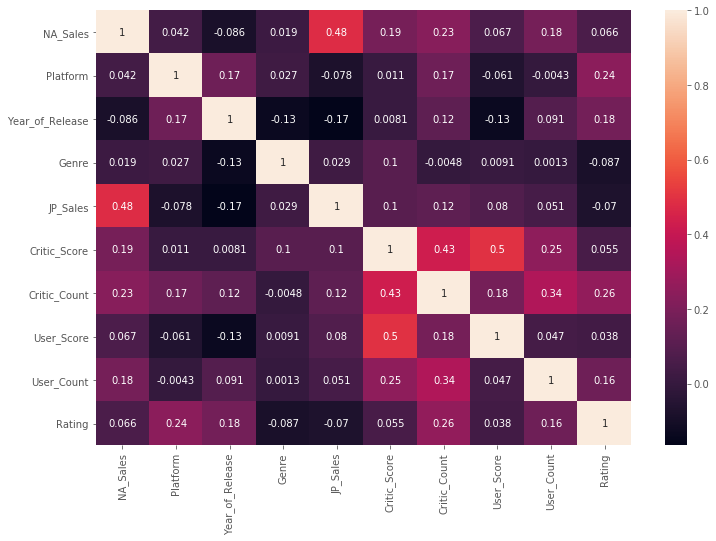

In [25]:
plt.figure(figsize=(12, 8))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True);

Relatively Strong Correlations:

.50 - Critic_Score & User_Score

.48 - NA_Sales & JP_Sales

.43 - Critic_Count & Critic_Score

.34 - Critic_Count & User_Count

In [26]:
A = df.Year_of_Release
B = df.JP_Sales
C = df.Critic_Score
D = df.Critic_Count
E = df.User_Score
F = df.User_Count
G = df.Platform
H = df.Genre
I = df.Rating

Y = df.NA_Sales

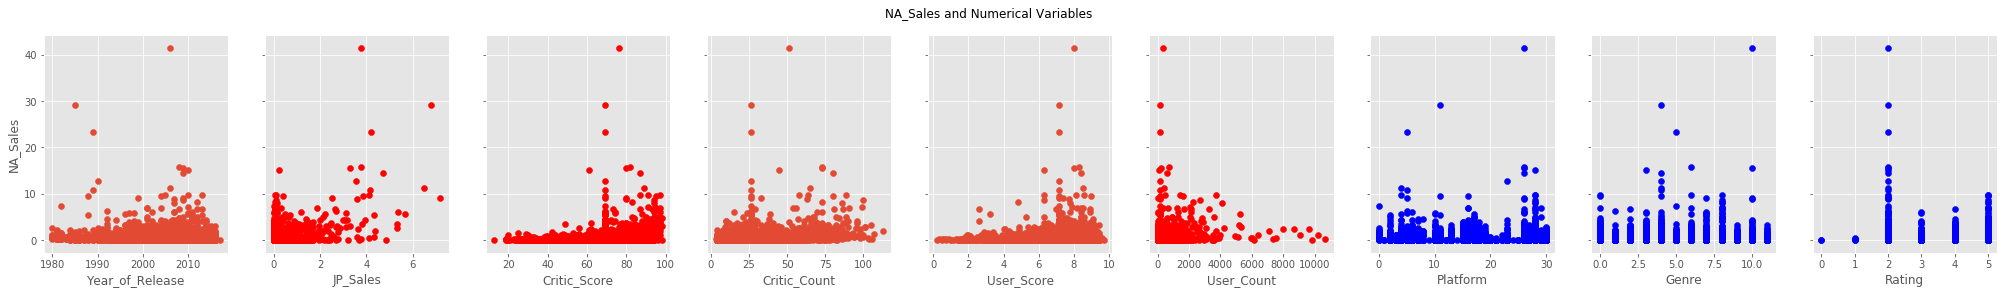

In [27]:
fig, axs = plt.subplots(1, 9, figsize=(35, 4), sharey=True)
fig.suptitle('NA_Sales and Numerical Variables')
axs[0].scatter(A, Y)
axs[1].scatter(B, Y, c = 'red')
axs[2].scatter(C, Y, c = 'red')
axs[3].scatter(D, Y)
axs[4].scatter(E, Y)
axs[5].scatter(F, Y, c = 'red')
axs[6].scatter(G, Y, c = 'blue')
axs[7].scatter(H, Y, c = 'blue')
axs[8].scatter(I, Y, c = 'blue')

axs[0].set_xlabel('Year_of_Release')
axs[1].set_xlabel('JP_Sales')
axs[2].set_xlabel('Critic_Score')
axs[3].set_xlabel('Critic_Count')
axs[4].set_xlabel('User_Score')
axs[5].set_xlabel('User_Count')
axs[6].set_xlabel('Platform')
axs[7].set_xlabel('Genre')
axs[8].set_xlabel('Rating')

axs[0].set_ylabel('NA_Sales')

plt.show()


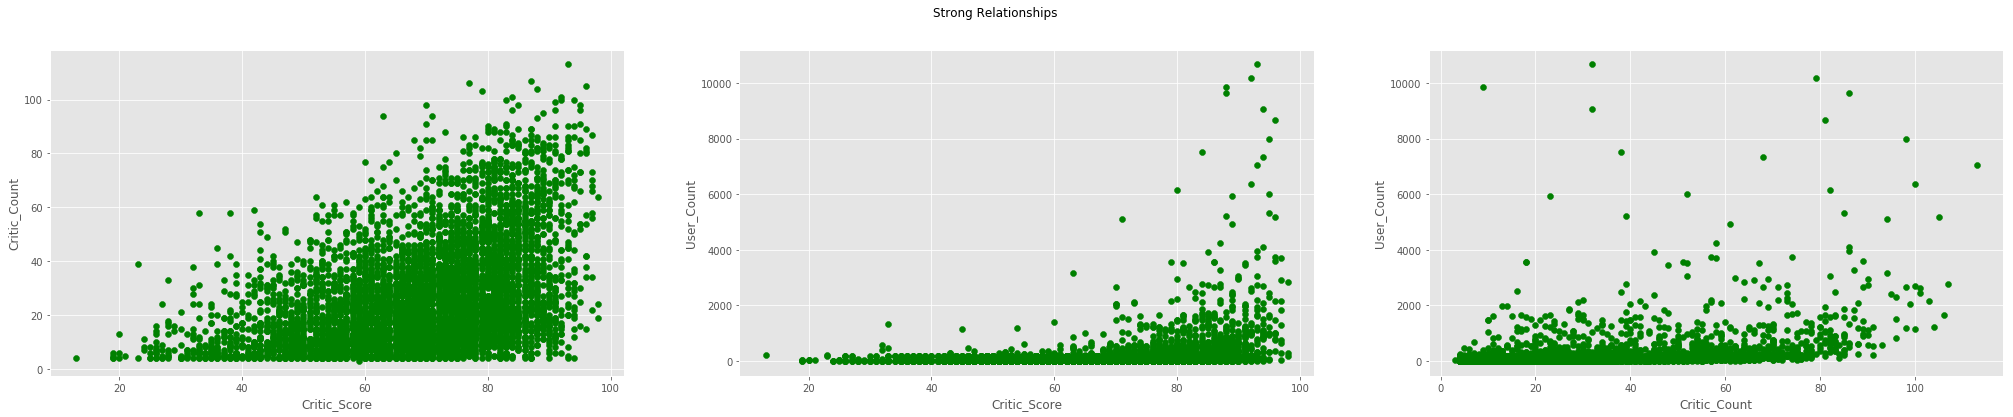

In [28]:
fig, axs2 = plt.subplots(1, 3, figsize=(35, 6), sharey=False)
fig.suptitle('Strong Relationships')
axs2[0].scatter(C, D, c="green")
axs2[1].scatter(C, F, c="green")
axs2[2].scatter(D, F, c="green")

axs2[0].set_xlabel('Critic_Score')
axs2[1].set_xlabel('Critic_Score')
axs2[2].set_xlabel('Critic_Count')

axs2[0].set_ylabel('Critic_Count')
axs2[1].set_ylabel('User_Count')
axs2[2].set_ylabel('User_Count')

plt.show()

In [29]:
#All relationships
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(35, 16), diagonal='kde');

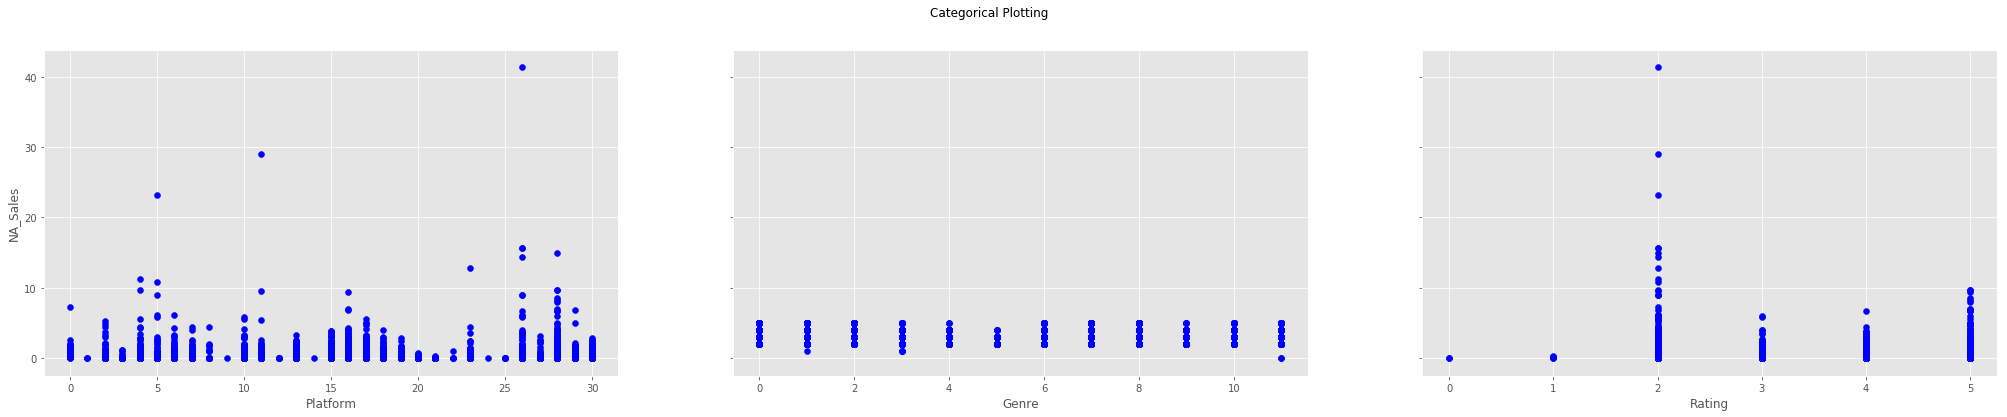

In [30]:
#Categorical relationships

fig, axs3 = plt.subplots(1, 3, figsize=(35, 6), sharey=True)
fig.suptitle('Categorical Plotting')
axs3[0].scatter(G, Y, c='blue')
axs3[1].scatter(H, I, c="blue")
axs3[2].scatter(I, Y, c="blue")

axs3[0].set_xlabel('Platform')
axs3[1].set_xlabel('Genre')
axs3[2].set_xlabel('Rating')

axs3[0].set_ylabel('NA_Sales')

plt.show()

In [31]:
'''
platformCount = df.groupby('Platform').count()['NA_Sales'].reset_index()
platformCount = platformCount[platformCount.NA_Sales>100]
platformCount.plot.bar(x='Platform', y='NA_Sales', rot=30, figsize=(12,6))
plt.title('Platform')
plt.ylabel('NA_Sales')


genreCount = df.groupby('Genre').count()['NA_Sales'].reset_index()
genreCount.plot.bar(x='Genre', y='NA_Sales', rot=30, figsize=(12,6))
plt.title('Genre')
plt.ylabel('NA_Sales')

ratingCount = df.groupby('Rating').count()['NA_Sales'].reset_index()
ratingCount = ratingCount[ratingCount.NA_Sales>50]
ratingCount.plot.bar(x='Rating', y='NA_Sales', rot=30, figsize=(12,6))
plt.title('Rating')
plt.ylabel('NA_Sales')
'''

"\nplatformCount = df.groupby('Platform').count()['NA_Sales'].reset_index()\nplatformCount = platformCount[platformCount.NA_Sales>100]\nplatformCount.plot.bar(x='Platform', y='NA_Sales', rot=30, figsize=(12,6))\nplt.title('Platform')\nplt.ylabel('NA_Sales')\n\n\ngenreCount = df.groupby('Genre').count()['NA_Sales'].reset_index()\ngenreCount.plot.bar(x='Genre', y='NA_Sales', rot=30, figsize=(12,6))\nplt.title('Genre')\nplt.ylabel('NA_Sales')\n\nratingCount = df.groupby('Rating').count()['NA_Sales'].reset_index()\nratingCount = ratingCount[ratingCount.NA_Sales>50]\nratingCount.plot.bar(x='Rating', y='NA_Sales', rot=30, figsize=(12,6))\nplt.title('Rating')\nplt.ylabel('NA_Sales')\n"

## Model

My target variable, or dependent variable (DV) will be NA_Sales.

My predictor variables, or independent variables (IV) will be Platform, Year_of_Release, Genre, JP_Sales, Critic_Score, Critic_Count, User_Score, User_Count, and Rating.

I will:

    Display the categorical variables as dummy variables using one-hot encoding to prevent the model from misinterpreting them as continuous.

    Check for multicollinearity to settle the negative impact of correlation and covariance among the independent variables. 

    Use feature scaling and normalization to give each variable an appropriate weight to prevent larger values from having a greater impact than smaller values.

    Use K-fold cross validation to run train-test splits to maximize the quality of predictions

### Pre-Processing
I will prepare the data for regression.

In [32]:
target = df[['NA_Sales']]
features = df[['Platform', 'Year_of_Release', 'Genre', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']]
features_test = df_predict[['Platform', 'Year_of_Release', 'Genre', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']]

#### Dummy Variables
I will create dummies so that the regression doesn't interpret categorical as continuous.

In [33]:
#For training data
platform_series_cat = pd.Series(df.Platform).astype('category')
genre_series_cat = pd.Series(df.Genre).astype('category')
rating_series_cat = pd.Series(df.Rating).astype('category')

platform_dummy = pd.get_dummies(platform_series_cat, prefix="PLAT")
genre_dummy = pd.get_dummies(genre_series_cat, prefix="GEN")
rating_dummy = pd.get_dummies(rating_series_cat, prefix="RAT")

features = features.drop(["Platform","Genre", "Rating"], axis=1)
features_and_dummy = pd.concat([target, features, platform_dummy, genre_dummy, rating_dummy], axis=1)

#Same for the testing data
platform_series_cat_test = pd.Series(df_predict.Platform).astype('category')
genre_series_cat_test = pd.Series(df_predict.Genre).astype('category')
rating_series_cat_test = pd.Series(df_predict.Rating).astype('category')

platform_dummy_test = pd.get_dummies(platform_series_cat_test, prefix="PLAT")
genre_dummy_test = pd.get_dummies(genre_series_cat_test, prefix="GEN")
rating_dummy_test = pd.get_dummies(rating_series_cat_test, prefix="RAT")

features_test = features_test.drop(["Platform", "Genre", "Rating"], axis=1)
df_predict_ols= pd.concat([features_test, platform_dummy_test, genre_dummy_test, rating_dummy_test], axis=1)

In [34]:
features_and_dummy.head()

,,NA_Sales,Year_of_Release,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,PLAT_0,PLAT_1,PLAT_2,...,GEN_8,GEN_9,GEN_10,GEN_11,RAT_0,RAT_1,RAT_2,RAT_3,RAT_4,RAT_5
,NA_Sales,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,2008.0,0.06,81.000000,49.000000,8.300000,62.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.72,0.72,1982.0,0.00,68.909602,26.554151,7.126412,166.707802,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.11,0.11,2004.0,0.00,68.909602,26.554151,7.126412,166.707802,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.15,0.15,2008.0,0.00,54.000000,57.000000,6.300000,19.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.00,0.00,2006.0,0.01,68.909602,26.554151,7.126412,166.707802,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Multicollinearity
I will eliminate IV's that are highly correlated.

**Scatter and Correlation Matrices**

In [35]:
features_and_dummy_cont = features_and_dummy.iloc[:,0:6]
#pd.plotting.scatter_matrix(features_and_dummy_cont,figsize  = [10, 10]);

In [36]:
features_and_dummy_cont.corr()

,NA_Sales,Year_of_Release,JP_Sales,Critic_Score,Critic_Count,User_Score
NA_Sales,1.000000,-0.086466,0.481023,0.188474,0.231553,0.066787
Year_of_Release,-0.086466,1.000000,-0.165570,0.008093,0.117156,-0.132954
JP_Sales,0.481023,-0.165570,1.000000,0.100269,0.120000,0.080417
Critic_Score,0.188474,0.008093,0.100269,1.000000,0.430189,0.496059
Critic_Count,0.231553,0.117156,0.120000,0.430189,1.000000,0.180749
User_Score,0.066787,-0.132954,0.080417,0.496059,0.180749,1.000000


In [37]:
abs(features_and_dummy_cont.corr())>0.40

,NA_Sales,Year_of_Release,JP_Sales,Critic_Score,Critic_Count,User_Score
NA_Sales,True,False,True,False,False,False
Year_of_Release,False,True,False,False,False,False
JP_Sales,True,False,True,False,False,False
Critic_Score,False,False,False,True,True,True
Critic_Count,False,False,False,True,True,False
User_Score,False,False,False,True,False,True


In [38]:
df_ols = features_and_dummy.drop("Critic_Score",axis=1)

In [39]:
df_ols.head()

,,NA_Sales,Year_of_Release,JP_Sales,Critic_Count,User_Score,User_Count,PLAT_0,PLAT_1,PLAT_2,PLAT_3,...,GEN_8,GEN_9,GEN_10,GEN_11,RAT_0,RAT_1,RAT_2,RAT_3,RAT_4,RAT_5
,NA_Sales,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,2008.0,0.06,49.000000,8.300000,62.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.72,0.72,1982.0,0.00,26.554151,7.126412,166.707802,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.11,0.11,2004.0,0.00,26.554151,7.126412,166.707802,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.15,0.15,2008.0,0.00,57.000000,6.300000,19.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.00,0.00,2006.0,0.01,26.554151,7.126412,166.707802,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


As I saw earlier when exploring the data, Critic_Score and Critic_Count are highly correlated. I need to drop Critic_Count since it is the most problematic.

### Feature Scaling and Standardization

The residuals are not normally distributed for each predictor, so I will need to use log normalization.

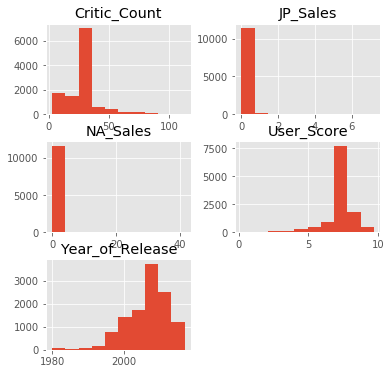

In [40]:
features_and_dummy_cont = features_and_dummy_cont.drop("Critic_Score",axis=1)
features_and_dummy_cont.hist(figsize  = [6, 6]);

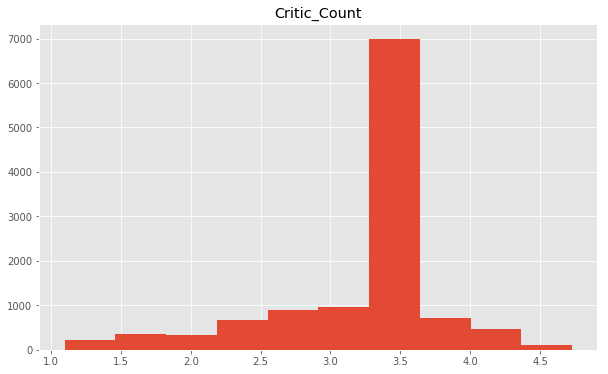

In [41]:
#Log transformation
data_log= pd.DataFrame([])
data_log["Critic_Count"] = np.log(features_and_dummy_cont["Critic_Count"])
#data_log["User_Score"] = np.log(features_and_dummy_cont["User_Score"])
#data_log["Year_of_Release"] = np.log(features_and_dummy_cont["Year_of_Release"])

data_log.hist(figsize  = [10, 6]);

JP_Sales has a lot of zeroes which is cumbersome to work with. I'll do a log transformation.


In [42]:
#data_log["JP_Sales"] = np.log(features_and_dummy_cont["JP_Sales"]);
#print(features_and_dummy_cont["JP_Sales"].describe())


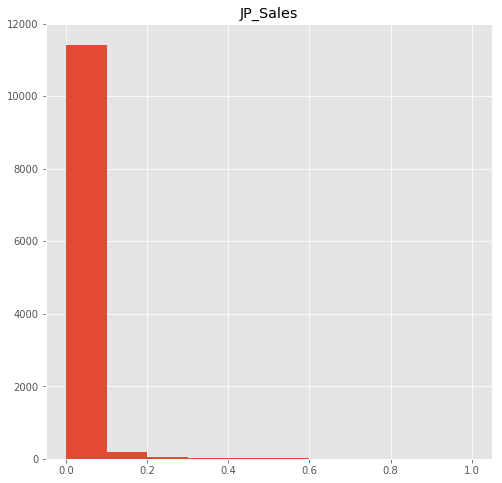

In [43]:
log_critic_count = data_log["Critic_Count"]          #Log normalization only helped with the skewness of Critic_Count
user_score = features_and_dummy_cont["User_Score"]    #Log normalization did not help the skewness of User_Score, Year_of_Release, and JP_Sales
year_of_release = features_and_dummy_cont["Year_of_Release"]
jp_sales = features_and_dummy_cont["JP_Sales"]

#Creating a new dataframe for the model's final features
features_final= pd.DataFrame([])

#features_final["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))

features_final["JP_Sales"] = (jp_sales-min(jp_sales))/(max(jp_sales)-min(jp_sales))

#features_final["JP_Sales"] = (jp_sales-np.mean(jp_sales))/np.sqrt(np.var(jp_sales))
#features_final["JP_Sales"] = (jp_sales-np.mean(jp_sales))/(max(jp_sales)-min(jp_sales))
#features_final["Critic_Count"] = (log_critic_count-np.mean(log_critic_count))/(max(log_critic_count)-min(log_critic_count))
#features_final["Critic_Count"] = (log_critic_count-min(log_critic_count))/(max(log_critic_count)-min(log_critic_count))

features_final["JP_Sales"] = (jp_sales-min(jp_sales))/(max(jp_sales)-min(jp_sales))

#features_final["RM"] = (rm-min(rm))/(max(rm)-min(rm))
#features_final["DIS"]   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
#features_final["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
#features_final["LSTAT"] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
#features_final["AGE"] = (age-np.mean(age))/(max(age)-min(age))
#features_final["PTRATIO"] = (logptratio)/(np.linalg.norm(logptratio))

features_final.hist(figsize  = [8, 8]);


In [44]:
#data_log["JP_Sales"].describe()

### OLS

How does NA_Sales (DV) change for each additional unit of the predictor (IV), where the predictor is a (log, min-max, standardized) transformed data matrix.

1. I will run a simple OLS regression between independent and dependent variables

2. Plot a regression line on the scatter plots

3. Plot the residuals using sm.graphics.plot_regress_exog()

4. Plot a Q-Q plot for regression residuals normality test

5. Store the following values in an array for each iteration: 

      Independent Variable, r_squared, intercept, slope, p-value, normality (JB)
      
Null Hypothesis (H0): The predictor is not a good predictor of NA_Sales

Alternative Hypothesis(H1): The predictor is a good indicator of NA_Sales

In [45]:
df.head()
df_ols.head()

,,NA_Sales,Year_of_Release,JP_Sales,Critic_Count,User_Score,User_Count,PLAT_0,PLAT_1,PLAT_2,PLAT_3,...,GEN_8,GEN_9,GEN_10,GEN_11,RAT_0,RAT_1,RAT_2,RAT_3,RAT_4,RAT_5
,NA_Sales,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,2008.0,0.06,49.000000,8.300000,62.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.72,0.72,1982.0,0.00,26.554151,7.126412,166.707802,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.11,0.11,2004.0,0.00,26.554151,7.126412,166.707802,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.15,0.15,2008.0,0.00,57.000000,6.300000,19.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.00,0.00,2006.0,0.01,26.554151,7.126412,166.707802,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
'''
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
features = ['Year_of_Release', 'JP_Sales', 'Critic_Count', 'User_Score', 'User_Count']
for idx, val in enumerate(features):
     
    print ("Game Sales DataSet - Regression Analysis and Diagnostics for formula: NA_Sales~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'NA_Sales'+ '~' + val
    
    model = smf.ols(formula=f, data=df_ols).fit()
    
    X_new = pd.DataFrame({val: [df_ols[val].min(), df_ols[val].max()]});
    preds = model.predict(X_new)
    df_ols.plot(kind='scatter', x=val, y='NA_Sales');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")
'''

'\nresults = [[\'ind_var\', \'r_squared\', \'intercept\', \'slope\', \'p-value\', \'normality (JB)\' ]]\nfeatures = [\'Year_of_Release\', \'JP_Sales\', \'Critic_Count\', \'User_Score\', \'User_Count\']\nfor idx, val in enumerate(features):\n     \n    print ("Game Sales DataSet - Regression Analysis and Diagnostics for formula: NA_Sales~" + val)\n    print ("-------------------------------------------------------------------------------------")\n\n    f = \'NA_Sales\'+ \'~\' + val\n    \n    model = smf.ols(formula=f, data=df_ols).fit()\n    \n    X_new = pd.DataFrame({val: [df_ols[val].min(), df_ols[val].max()]});\n    preds = model.predict(X_new)\n    df_ols.plot(kind=\'scatter\', x=val, y=\'NA_Sales\');\n    plt.plot(X_new, preds, c=\'red\', linewidth=2);\n    plt.show()\n    fig = plt.figure(figsize=(15,8))\n    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)\n    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line=\'45\', fit=True,   )\n    plt.show()\n    \n    r

In [47]:
pd.DataFrame(results)

NameError: name 'results' is not defined

The normality of the residuals (error terms) is questionable.

The Q-Q plots show that each predictor is not normal. JP_Sales is the closest to normal but not quite.

The JB values are large (n is large so it's a better than Q-Q plot), meaning that none of the errors are normally distributed.

I cannot tell whether the residuals show signs of heteroscedasticity.

----

**r_squared**
JP_Sales is the strongest explanatory variable for NA_Sales prediction.
23% of the variability in NA_Sales is because of JP_Sales.

Other strong explanatory variables are:

Critic_Count accounts for 5% of the variability in NA_Sales.

User_Count accounts for 3% of the variability in NA_Sales.

**slope**
Most predictors have a positive correlation with NA_Sales, except for Year_of_Release, suggesting that older games have more overall sales than newer games in North America. 

**p-Value**
Most of these variables are highly statistically significant since they have p-values lower than .05 and .0001, which means that changes in any predictor would impact NA_Sales.
Genre comes close to .05, but it is still statistically significant.

**normality(JB)**
All predictors fail the Jarque-Bera test with high values much larger than 1, which means they are normal


In [ ]:
#df_ols.head()

#### Linear Regression using OLS Statsmodel

In [48]:
outcome = 'NA_Sales'
predictors = df_ols.drop('NA_Sales', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_ols['NA_Sales'],predictors_int).fit()
model.summary()

#print((model.params))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:54:22   Log-Likelihood:                -12385.
No. Observations:               11701   AIC:                         2.487e+04
Df Residuals:                   11649   BIC:                         2.526e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              36.1205      4.398      8.214      0.000      27.500      44.740
Year_of_Release    -0.0232      0.003     -8.238      0.000      -0.029      -0.018
JP_Sales            1.3552      0.022     60.392      0.000       1.311       1.399
Critic_Count        0.0073      0.001     12.735      0.000       0.006       0.008
User_Score          0.0041      0.007      0.595      0.552      -0.009       0.017
User_Count          0.0003   1.86e-05     15.699      0.000       0.000       0.000
PLAT_0              1.3203      0.126     10.438      0.000       1.072       1.568
PLAT_1              0.9122      0.412      2.216      0.027       0.105       1.719
PLAT_2              1.2711      0.182      6.978      0.000       0.914       1.628
PLAT_3              0.9557      0.181      5.286      0.000       0.601       1.310
PLAT_4              1.3293      0.167      7.978      0.000       1.003       1.656
PLAT_5              1.0324      0.160      6.472      0.000       0.720       1.345
PLAT_6              1.3310      0.155      8.563      0.000       1.026       1.636
PLAT_7              1.3254      0.158      8.397      0.000       1.016       1.635
PLAT_8              1.4890      0.200      7.461      0.000       1.098       1.880
PLAT_9              0.6208      0.688      0.902      0.367      -0.728       1.970
PLAT_10             1.2842      0.148      8.685      0.000       0.994       1.574
PLAT_11             0.5045      0.139      3.626      0.000       0.232       0.777
PLAT_12             0.7795      0.305      2.552      0.011       0.181       1.378
PLAT_13             1.2336      0.171      7.228      0.000       0.899       1.568
PLAT_14             1.1813      0.690      1.713      0.087      -0.171       2.533
PLAT_15             1.1431      0.141      8.106      0.000       0.867       1.420
PLAT_16             1.3449      0.158      8.516      0.000       1.035       1.654
PLAT_17             1.4255      0.174      8.170      0.000       1.083       1.767
PLAT_18             1.4436      0.189      7.643      0.000       1.073       1.814
PLAT_19             1.2936      0.169      7.675      0.000       0.963       1.624
PLAT_20             1.3759      0.186      7.414      0.000       1.012       1.740
PLAT_21             0.7419      0.147      5.052      0.000       0.454       1.030
PLAT_22             1.0247      0.329      3.119      0.002       0.381       1.669
PLAT_23             0.4558      0.139      3.287      0.001       0.184       0.728
PLAT_24             0.8099      0.689      1.176      0.240      -0.541       2.160
PLAT_25             0.9491      0.312      3.044      0.002       0.338       1.560
PLAT_26             1.5722      0.170      9.269      0.000       1.240       1.905
PLAT_27             1.3981      0.193      7.254      0.000

#### Linear Regression using scikit-learn

In [49]:
from sklearn.linear_model import LinearRegression

predictors = df_ols.drop('NA_Sales', axis=1)
y = df_ols['NA_Sales']
linreg = LinearRegression()
linreg.fit(predictors, y)

# coefficients
print(linreg.coef_)

# intercept
linreg.intercept_


[-2.31843103e-02  1.35521413e+00  7.34122823e-03  4.07038860e-03
  2.92458732e-04  1.55135907e-01 -2.52928631e-01  1.05914099e-01
 -2.09520956e-01  1.64108640e-01 -1.32806663e-01  1.65872374e-01
  1.60192315e-01  3.23816772e-01 -5.44424438e-01  1.18998865e-01
 -6.60691338e-01 -3.85662338e-01  6.84084383e-02  1.61342952e-02
 -2.20651296e-02  1.79690000e-01  2.60303607e-01  2.78430174e-01
  1.28430807e-01  2.10696215e-01 -4.23274481e-01 -1.40499108e-01
 -7.09372527e-01 -3.55238585e-01 -2.16040141e-01  4.07047097e-01
  2.32940403e-01  4.27038347e-01  1.39875774e-01  5.09490208e-01
  1.08376562e-02 -5.81706230e-02 -2.12206962e-02  8.15924771e-03
  1.96983711e-01 -5.02594899e-03  7.78339211e-02 -2.57285639e-01
  8.36891520e-02 -7.76094949e-03  9.47435340e-02 -1.22783365e-01
  2.14721075e-01 -4.03340945e-02 -1.12072086e-01  1.66294188e-03
 -6.66661562e-02  2.68831991e-03]


46.315747799454826

### Model Fit and Validation

#### Feature Selection

In Machine learning, if you put garbage in (noise from the data), only garbage will come out.

When the number of features is large, you can assist your algorithm by only including important features. Feature subsets can give better results than complete set of features for the same algorithm.

Being picky with features can reduce training and evaluation time.

    enables the ML algorithm to train faster.
    reduces the complexity of a model and makes it easier to interpret.
    improves the accuracy of a model if the right subset is chosen.
    reduces overfitting.

Wrapper methods use a subset of features to train a model:

    Stepwise Selection
    Feature ranking with recursive feature elimination
    Forward Selection

I will select features/predictors that are more important for the model in order to reduce over-fitting. 

(Overfitting is a modeling error which occurs when a function is too closely fit to a limited set of data points. Overfitting the model generally takes the form of including unnecessary features making the model overly complex.) 

The model becomes less accurate with each additional predictor. 

If the statistical analysis fits too closely or exactly to a particular set of data, it may fail to fit additional data or predict future observations reliably.

**Stepwise Selection**

In [50]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [51]:
X = predictors
y = pd.DataFrame(df_ols, columns= ["NA_Sales"])

In [52]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  JP_Sales                       with p-value 0.0
Add  Critic_Count                   with p-value 1.47322e-105
Add  User_Count                     with p-value 7.91477e-41
Add  GEN_7                          with p-value 1.84289e-44
Add  PLAT_23                        with p-value 1.55456e-24
Add  PLAT_28                        with p-value 6.426e-17
Add  PLAT_26                        with p-value 3.6102e-17
Add  Year_of_Release                with p-value 3.42833e-20
Add  PLAT_21                        with p-value 1.56871e-14
Add  PLAT_11                        with p-value 1.53112e-11
Add  RAT_2                          with p-value 1.55516e-10
Add  GEN_4                          with p-value 2.84616e-10
Add  PLAT_30                        with p-value 2.59609e-09
Add  GEN_11                         with p-value 1.91583e-08
Add  PLAT_15                        with p-value 3.33824e-07
Add  GEN_10                         with p-value 3.73207e-06
Add  PLAT_17                      

In [53]:
import statsmodels.api as sm
X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     237.2
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:55:31   Log-Likelihood:                -12399.
No. Observations:               11701   AIC:                         2.485e+04
Df Residuals:                   11676   BIC:                         2.503e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              42.8269      3.129     13.687      0.000      36.693      48.960
JP_Sales            1.3512      0.022     60.618      0.000       1.308       1.395
Critic_Count        0.0075      0.001     13.635      0.000       0.006       0.009
User_Count          0.0003   1.84e-05     16.157      0.000       0.000       0.000
GEN_7              -0.2626      0.024    -10.997      0.000      -0.309      -0.216
PLAT_23            -0.8489      0.060    -14.249      0.000      -0.966      -0.732
PLAT_28             0.2527      0.027      9.439      0.000       0.200       0.305
PLAT_26             0.2382      0.025      9.445      0.000       0.189       0.288
Year_of_Release    -0.0213      0.002    -13.694      0.000      -0.024      -0.018
PLAT_21            -0.5696      0.067     -8.560      0.000      -0.700      -0.439
PLAT_11            -0.7858      0.091     -8.590      0.000      -0.965      -0.606
RAT_2              -0.1210      0.019     -6.337      0.000      -0.158      -0.084
GEN_4               0.1969      0.031      6.409      0.000       0.137       0.257
PLAT_30             0.3279      0.056      5.815      0.000       0.217       0.438
GEN_11             -0.1283      0.034     -3.756      0.000      -0.195      -0.061
PLAT_15            -0.1698      0.029     -5.819      0.000      -0.227      -0.113
GEN_10              0.0951      0.020      4.661      0.000       0.055       0.135
PLAT_17             0.0863      0.025      3.403      0.001       0.037       0.136
GEN_1              -0.0630      0.025     -2.485      0.013      -0.113      -0.013
RAT_4              -0.0700      0.022     -3.161      0.002      -0.113      -0.027
PLAT_13            -0.1032      0.030     -3.389      0.001      -0.163      -0.044
PLAT_3             -0.3635      0.113     -3.223      0.001      -0.585      -0.142
PLAT_5             -0.2732      0.091     -3.004      0.003      -0.451      -0.095
GEN_8               0.0820      0.026      3.152      0.002       0.031       0.133
GEN_6               0.0771      0.026      3.006      0.003       0.027       0.127
==============================================================================
Omnibus:                    24286.926   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        240375536.930
Skew:                          17.218   Prob(JB):                         0.00
Kurtosis:                     704.320   Cond. No.                     9.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#X.drop('PLAT_30', axis=1)
X.drop('PLAT_28', axis=1)

,,Year_of_Release,JP_Sales,Critic_Count,User_Score,User_Count,PLAT_0,PLAT_1,PLAT_2,PLAT_3,PLAT_4,...,GEN_8,GEN_9,GEN_10,GEN_11,RAT_0,RAT_1,RAT_2,RAT_3,RAT_4,RAT_5
,NA_Sales,,,,,,,,,,,,,,,,,,,,,
0,0.00,2008.0,0.06,49.000000,8.300000,62.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.72,1982.0,0.00,26.554151,7.126412,166.707802,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.11,2004.0,0.00,26.554151,7.126412,166.707802,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.15,2008.0,0.00,57.000000,6.300000,19.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.00,2006.0,0.01,26.554151,7.126412,166.707802,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0.00,2008.0,0.00,26.554151,7.126412,166.707802,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.03,2010.0,0.00,26.554151,7.126412,166.707802,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0.10,2005.0,1.12,20.000000,7.700000,6.000000,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8,0.18,2010.0,0.00,26.554151,7.126412,166.707802,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
#result.remove('PLAT_28')
result.remove('PLAT_30')

In [78]:
X_train = X[result]
X_test = df_predict_ols[result]
y_train = y

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: shapes (11701,22) and (54,) not aligned: 22 (dim 1) != 54 (dim 0)

In [ ]:
solution_3 = pd.DataFrame(y_hat_test, columns = ["Prediction"])
solution_3.head()

In [ ]:
original = pd.DataFrame(df_predict.Id)

In [ ]:
original.head()
solution_3.head()
e = pd.Series([solution_3])
f = pd.Series([original])
final_3 = pd.concat([e,f])

In [ ]:
final_3 = pd.concat([original, solution_3], axis=1)

In [ ]:
final_3.head()

In [ ]:
final_3.to_csv("./bennett_model_3.csv", sep=',',index=False)

**Feature ranking with recursive feature elimination (RFE)***

I will use RFE to elect the pre-specified 𝑛 most important features.

RFE assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

First, the estimator is trained on the initial set of features and the importance of each feature is obtained. Then, the least important features are trimmed from the current set of features. 

That procedure is recursively repeated on the trimmed set until the desired number of features to select is eventually reached.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(predictors, df_ols["NA_Sales"])

In [ ]:
selector.support_  #Calling the .support_ attribute tells you which variables are selected

In [ ]:
selector.ranking_   #Calling .ranking_ shows the ranking of the features, selected features are assigned rank 1

In [ ]:
estimators = selector.estimator_    #By calling .estimator_ on the RFE object, you can get access to the parameter estimates through .coef_ and .intercept.
print(estimators.coef_)
print(estimators.intercept_)

In [ ]:
selected_columns = X.columns[selector.support_ ]   #Fitting the linear regression model using the selected columns
linreg.fit(X[selected_columns],y)

In [ ]:
yhat = linreg.predict(X[selected_columns])         #Predicting 𝑦̂ using my model, using .predict() in scikit-learn
yhat

In [ ]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
r_squared

In [ ]:
adjusted_r_squared

In [57]:
X_train = X[selected_columns]
X_test = df_predict_ols[selected_columns]
y_train = y

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


NameError: name 'selected_columns' is not defined

In [ ]:
solution = pd.DataFrame(y_hat_test, columns = ["Prediction"])
solution.head()

In [ ]:
original = pd.DataFrame(df_predict.Id)

In [ ]:
original.head()
solution.head()

In [ ]:
a = pd.Series([solution_2])
b = pd.Series([original_2])
final = pd.concat([a,b])

In [ ]:
final = pd.concat([original, solution], axis=1)

In [ ]:
final.head()

In [ ]:
final.to_csv("./bennett_model.csv", sep=',',index=False)

**Forward Selection with Statsmodel**

Python's statsmodels doesn't have a built-in method for choosing a linear model by forward selection.

It tries to optimize adjusted R-squared by adding features that help the most one at a time until the score goes down or you run out of features.

In [ ]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection  
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
data = df_ols

model = forward_selected(data, 'NA_Sales')

print(model.model.formula, "\n")
print(model.rsquared_adj)

In [ ]:
df_ols.head()

In [ ]:
forward_selection_columns = ['JP_Sales', 'Critic_Count', 'User_Count', 'GEN_7', 'PLAT_23', 'PLAT_26', 'Year_of_Release', 'PLAT_21', 'PLAT_11', 'RAT_2', 'GEN_4', 'GEN_11', 'PLAT_15', 'GEN_1', 'PLAT_17', 'GEN_1', 'RAT_4', 'PLAT_13', 'PLAT_3', 'PLAT_5', 'GEN_8', 'GEN_6', 'PLAT_18', 'PLAT_12', 'PLAT_2', 'PLAT_19', 'PLAT_25', 'PLAT_8', 'PLAT_1']

X_train = X[forward_selection_columns]
X_test = df_predict_ols[forward_selection_columns]
y_train = y

linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
solution_2 = pd.DataFrame(y_hat_test, columns = ["Prediction"])
original_2 = pd.DataFrame(df_predict.Id)


In [ ]:
original_2.head()
solution_2.head()

In [ ]:
c = pd.Series([solution_2])
d = pd.Series([original_2])
final = pd.concat([c,d])

In [ ]:
final_2 = pd.concat([original_2, solution_2], axis=1)

In [ ]:
final_2.head()

In [ ]:
final_2.to_csv("./bennett_model_2.csv", sep=',',index=False)

## Interpret

Compute them and contrast them with the R-squared and adjusted-R-squared in your statsmodels output using stepwise selection. 
Which of the two models would you prefer?